In [23]:
prime_pi(1990)

300

In [16]:
import ast

tau_list = []

with open('/Users/barrybrent/data/tauUpTo10^5', 'r') as rfile:
    for line in rfile:
        line = line.strip()
        if line:  # skip empty lines
            # Replace Mathematica braces with Python brackets
            line = line.replace("{", "[").replace("}", "]")
            # Convert to Python list
            tau_list.append(ast.literal_eval(line))

# Now tau_list is a list of [n, tau] pairs
for k in range(6):
    n, tau = tau_list[k]
    print((n, tau,type(tau)))
print(len(tau_list))

(1, 1, <class 'int'>)
(2, -24, <class 'int'>)
(3, 252, <class 'int'>)
(4, -1472, <class 'int'>)
(5, 4830, <class 'int'>)
(6, -6048, <class 'int'>)
100000


In [38]:
from sage.all import sigma, nth_prime
import pickle
import ast

tau_list = []

with open('/Users/barrybrent/data/tauUpTo10^5', 'r') as rfile:
    for line in rfile:
        line = line.strip()
        if line:  # skip empty lines
            # Replace Mathematica braces with Python brackets
            line = line.replace("{", "[").replace("}", "]")
            # Convert to Python list
            tau_list.append(ast.literal_eval(line))
#tau_list was made in the Mathematica notebook
# "tauTo10^5maker Lehmer mthd.nb
# the code to convert the Mathematica file to Python was made by chatGPT
print(tau_list[0:5:1])

prime_tau_list = [[1,1]]# bc need h_0 = 1 in lemma 2.2
for k in range(0, 11): # prime_pi(1990) = 300
    pair=tau_list[k]
    n=pair[0]
    if is_prime(n):
        tau=pair[1] 
        prime_tau_list.append([n,tau])

def h(n): 
    return prime_tau_list[n][1] # so h(0) = 1
for n in [0..5]:
    print((n,h(n)))

[[1, 1], [2, -24], [3, 252], [4, -1472], [5, 4830]]
(0, 1)
(1, -24)
(2, 252)
(3, 4830)
(4, -16744)
(5, 534612)


In [ ]:
from sage.all import sigma, nth_prime
import pickle
import ast

tau_list = []

with open('/Users/barrybrent/data/tauUpTo10^5', 'r') as rfile:
    for line in rfile:
        line = line.strip()
        if line:  # skip empty lines
            # Replace Mathematica braces with Python brackets
            line = line.replace("{", "[").replace("}", "]")
            # Convert to Python list
            tau_list.append(ast.literal_eval(line))
#tau_list was made in the Mathematica notebook
# "tauTo10^5maker Lehmer mthd.nb
# the code to convert the Mathematica file to Python was made by chatGPT


prime_tau_list = [[1,1]]# ... = [n,tau], bc need h_0 = 1 in lemma 2.2

for k in range(0, 1991): # bc prime_pi(1990) = 300
    print("making prime_tau_list:",k)
    pair=tau_list[k]
    n=pair[0]
    if is_prime(n):
        tau=pair[1] 
        prime_tau_list.append([n,tau])
        


with open('/Users/barrybrent/data/run27sept25no10.txt', 'wb') as wfile:
    pickle.dump(prime_tau_lst, wfile) #output snipped

def h(n): 
    return prime_tau_list[n][1] 

j_list=[0,1] # so j(0) = 0, harmless, and j(1) = 1, per lemma 2.2
for n in [2..299]:
    print("making j_list",n)

    partial_sum=0
    for r in [1..n-1]:
        partial_sum=partial_sum+j_list[r]*h(n-r) 
    
    j_n=n*h(n)-partial_sum #per lemma 2.2
    j_list.append(j_n)
    
with open('/Users/barrybrent/data/run27sept25no11.txt', 'wb') as wfile:
    pickle.dump(j_list, wfile) #output snipped

In [42]:
import pickle
with open('/Users/barrybrent/data/run27sept25no11.txt', 'rb') as rfile:
    j_list = pickle.load(rfile)
print(j_list[:5])
lst=j_list[:5]
def P_matrix(lst):
    lenlist=len(lst)
    columns=[lst]
    for k in range(1,lenlist):
        column=[0]*(k-1)
        column=column+[-k]
        column=flatten(column+[lst])
        column=column+[lst]
        column=column[:lenlist]
        print("length of column k:",len(column))
        print("column",k,":")
        print(column)
        columns+=[column]
    print("number of columns:",len(columns))
    return (matrix(columns)).transpose()
inpt=[j for j in lst]
print("inputs:")
print(inpt)
pl=P_matrix(inpt)
print("pl:")
print(pl)    
print("characteristic polynomial")
cp=pl.charpoly()
print(cp)
roots=cp.real_roots()
from sage.rings.real_mpfr import RealField
RF = RealField(100)
aar= [abs(RF(r)) for r in roots]
print(aar)
minn=min(aar)
print("mimimum:",minn)

[0, 1, 528, 26910, 440978]
inputs:
[0, 1, 528, 26910, 440978]
length of column k: 5
column 1 :
[-1, 0, 1, 528, 26910]
length of column k: 5
column 2 :
[0, -2, 0, 1, 528]
length of column k: 5
column 3 :
[0, 0, -3, 0, 1]
length of column k: 5
column 4 :
[0, 0, 0, -4, 0]
number of columns: 5
pl:
[     0     -1      0      0      0]
[     1      0     -2      0      0]
[   528      1      0     -3      0]
[ 26910    528      1      0     -4]
[440978  26910    528      1      0]
characteristic polynomial
x^5 + 10*x^3 - 10560*x^2 + 807315*x - 10594032
[15.089276203885019000949796464]
mimimum: 15.089276203885019000949796464


In [45]:
def P_matrix(lst):
    lenlist=len(lst)
    columns=[lst]
    for k in range(1,lenlist):
        column=[0]*(k-1)
        column=column+[-k]
        column=flatten(column+[lst])
        column=column+[lst]
        column=column[:lenlist]
        print("length of column k:",len(column))
        print("column",k,":")
        print(column)
        columns+=[column]
    print("number of columns:",len(columns))
    return (matrix(columns)).transpose()

import pickle
with open('/Users/barrybrent/data/run27sept25no11.txt', 'rb') as rfile:
    j_list = pickle.load(rfile)
print(j_list[1:5])
lst=j_list[1:5]
inpt=[j for j in lst]
print(inpt)
pl=P_matrix(inpt)
print("pl:")
print(pl)    
print("characteristic polynomial")
cp=pl.charpoly()
print(cp)
roots=cp.real_roots()
from sage.rings.real_mpfr import RealField
RF = RealField(100)
aar= [abs(RF(r)) for r in roots]
print("aar:")
print(aar)
if aar!=[]:
    minn=min(aar)
    print("mimimum:",minn)

[1, 528, 26910, 440978]
[1, 528, 26910, 440978]
length of column k: 4
column 1 :
[-1, 1, 528, 26910]
length of column k: 4
column 2 :
[0, -2, 1, 528]
length of column k: 4
column 3 :
[0, 0, -3, 1]
number of columns: 4
pl:
[     1     -1      0      0]
[   528      1     -2      0]
[ 26910    528      1     -3]
[440978  26910    528      1]
characteristic polynomial
x^4 - 4*x^3 + 3174*x^2 - 221620*x + 3700669
aar:
[]


In [50]:
def P_matrix(lst):
    lenlist=len(lst)
    columns=[lst]
    for k in range(1,lenlist):
        column=[0]*(k-1)
        column=column+[-k]
        column=flatten(column+[lst])
        column=column+[lst]
        column=column[:lenlist]
        print("length of column k:",len(column))
        print("column",k,":")
        print(column)
        columns+=[column]
    print("number of columns:",len(columns))
    return (matrix(columns)).transpose()

import pickle
with open('/Users/barrybrent/data/run27sept25no11.txt', 'rb') as rfile:
    j_list = pickle.load(rfile)
from sage.all import *
precision_bits = 100
CIF = ComplexIntervalField(precision_bits)
x = polygen(QQ)  # Can remain in preamble if all polynomials are in one variable
for bound in range(2,5):
    print(j_list[1:bound])
    lst=j_list[1:bound]
    inpt=[j for j in lst]
    print(inpt)
    pl=P_matrix(inpt)
    print("pl:")
    print(pl)    
    print("characteristic polynomial")
    cp=pl.charpoly()
    print(cp)
    roots = cp.roots(ring=CIF, multiplicities=False)        # produces list of roots as Sage objects
    aar = [r.abs() for r in roots]
    print("aar:")
    print(aar)
    # compute absolute value for each root (before any conversion)
    if aar!=[]:
        minn = min(aar)                                         # minimum modulus
        print("minimum:", minn)
    print("======================================================================================================")


[1]
[1]
number of columns: 1
pl:
[1]
characteristic polynomial
x - 1
aar:
[1]
minimum: 1
[1, 528]
[1, 528]
length of column k: 2
column 1 :
[-1, 1]
number of columns: 2
pl:
[  1  -1]
[528   1]
characteristic polynomial
x^2 - 2*x + 529
aar:
[23.0000000000000000000000000000?, 23.0000000000000000000000000000?]
minimum: 23.0000000000000000000000000000?
[1, 528, 26910]
[1, 528, 26910]
length of column k: 3
column 1 :
[-1, 1, 528]
length of column k: 3
column 2 :
[0, -2, 1]
number of columns: 3
pl:
[    1    -1     0]
[  528     1    -2]
[26910   528     1]
characteristic polynomial
x^3 - 3*x^2 + 1587*x - 55405
aar:
[25.5901917061402346282071818430?, 46.530498991936329207705876639?, 46.530498991936329207705876639?]
minimum: 25.5901917061402346282071818430?


In [51]:
def P_matrix(lst):
    lenlist=len(lst)
    columns=[lst]
    for k in range(1,lenlist):
        column=[0]*(k-1)
        column=column+[-k]
        column=flatten(column+[lst])
        column=column+[lst]
        column=column[:lenlist]
        print("length of column k:",len(column))
        print("column",k,":")
        print(column)
        columns+=[column]
    print("number of columns:",len(columns))
    return (matrix(columns)).transpose()

import pickle
with open('/Users/barrybrent/data/run27sept25no11.txt', 'rb') as rfile:
    j_list = pickle.load(rfile)
from sage.all import *
precision_bits = 100
CIF = ComplexIntervalField(precision_bits)
x = polygen(QQ)  # Can remain in preamble if all polynomials are in one variable
matrix_list=[]
charpol_list=[]
roots_list=[]
aar_list=[]
mins_list=[]
for bound in range(2,5):
    print(j_list[1:bound])
    lst=j_list[1:bound]
    inpt=[j for j in lst]
    pl=P_matrix(inpt)
    matrix_list+=[(bound,pl)]
    cp=pl.charpoly()
    charpol_list+=[(bound,cp)]
    roots = cp.roots(ring=CIF, multiplicities=False)        # produces list of roots as Sage objects
    roots_list+=[(bound,roots)]
    aar = [r.abs() for r in roots]
    aar_list+=[(bound,aar)]
    # compute absolute value for each root (before any conversion)
    if aar!=[]:
        minn = min(aar)                                         # minimum modulus
        mins_list+=[(bound,minn)]
    if bound<6:
        print("input:",inpt)
        print("matrix:")
        print(pl)    
        print("characteristic polynomial:")
        print(cp)
        print("roots:")
        print(roots)
        if aar!=[]:
            print("absolute values of the roots:")
            print(aar)
            print("minimum modulus:")
            print(minn)  
    print("======================================================================================================")


[1]
number of columns: 1
input: [1]
matrix:
[1]
characteristic polynomial:
x - 1
roots:
[1]
absolute values of the roots:
[1]
minimum modulus:
1
[1, 528]
length of column k: 2
column 1 :
[-1, 1]
number of columns: 2
input: [1, 528]
matrix:
[  1  -1]
[528   1]
characteristic polynomial:
x^2 - 2*x + 529
roots:
[1 - 22.9782505861521146394024458729?*I, 1 + 22.9782505861521146394024458729?*I]
absolute values of the roots:
[23.0000000000000000000000000000?, 23.0000000000000000000000000000?]
minimum modulus:
23.0000000000000000000000000000?
[1, 528, 26910]
length of column k: 3
column 1 :
[-1, 1, 528]
length of column k: 3
column 2 :
[0, -2, 1]
number of columns: 3
input: [1, 528, 26910]
matrix:
[    1    -1     0]
[  528     1    -2]
[26910   528     1]
characteristic polynomial:
x^3 - 3*x^2 + 1587*x - 55405
roots:
[25.5901917061402346282071818430?, -11.2950958530701173141035909215? - 45.1387654473241656845868168836?*I, -11.2950958530701173141035909215? + 45.1387654473241656845868168836?*I]


bound: 2


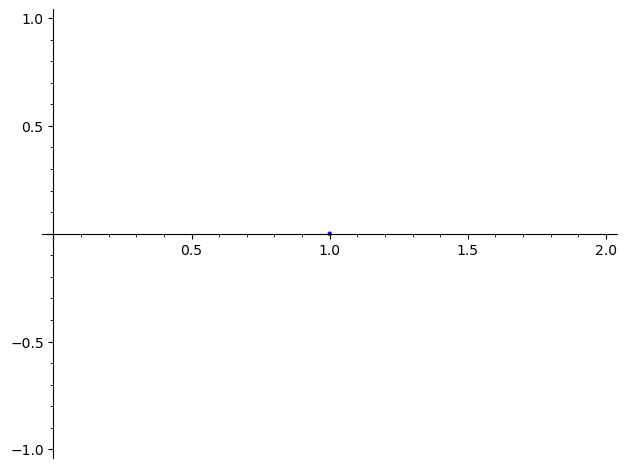

input: [1]
matrix:
[1]
characteristic polynomial:
x - 1
roots:
[1]
centers:
[1.0000000000000000000000000000]
maximum radius: 0.000000000000000
absolute values of the roots:
[1]
minimum modulus:
1
bound: 3


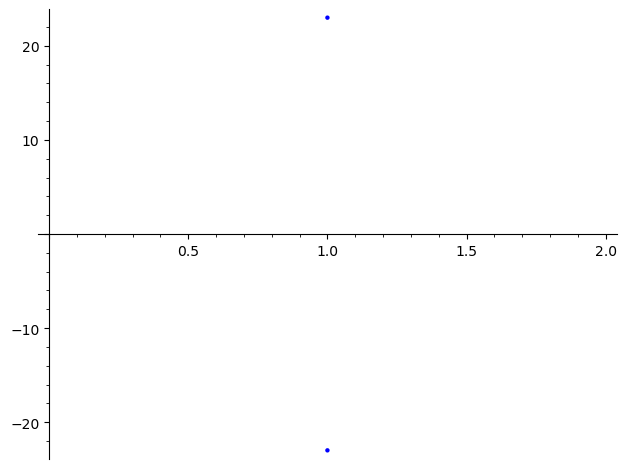

input: [1, 528]
matrix:
[  1  -1]
[528   1]
characteristic polynomial:
x^2 - 2*x + 529
roots:
[1 - 22.9782505861521146394024458729?*I, 1 + 22.9782505861521146394024458729?*I]
centers:
[1.0000000000000000000000000000 - 22.978250586152114639402445873*I, 1.0000000000000000000000000000 + 22.978250586152114639402445873*I]
maximum radius: 5.49292229023855e-31
absolute values of the roots:
[23.0000000000000000000000000000?, 23.0000000000000000000000000000?]
minimum modulus:
23.0000000000000000000000000000?
bound: 4


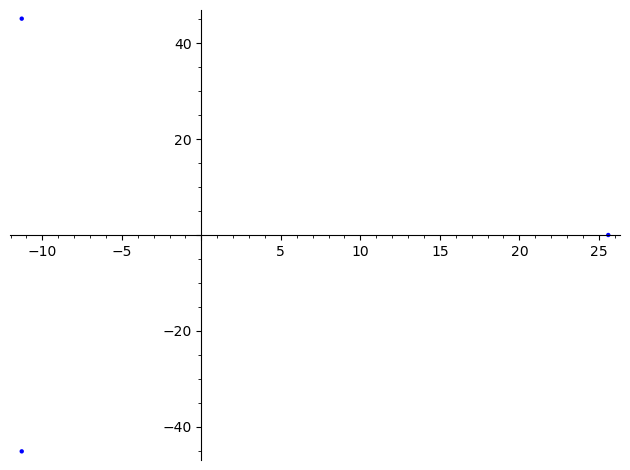

input: [1, 528, 26910]
matrix:
[    1    -1     0]
[  528     1    -2]
[26910   528     1]
characteristic polynomial:
x^3 - 3*x^2 + 1587*x - 55405
roots:
[25.5901917061402346282071818430?, -11.2950958530701173141035909215? - 45.1387654473241656845868168836?*I, -11.2950958530701173141035909215? + 45.1387654473241656845868168836?*I]
centers:
[25.590191706140234628207181843, -11.295095853070117314103590921 - 45.138765447324165684586816884*I, -11.295095853070117314103590921 + 45.138765447324165684586816884*I]
maximum radius: 2.79364040990087e-30
absolute values of the roots:
[25.5901917061402346282071818430?, 46.530498991936329207705876639?, 46.530498991936329207705876639?]
minimum modulus:
25.5901917061402346282071818430?
bound: 5


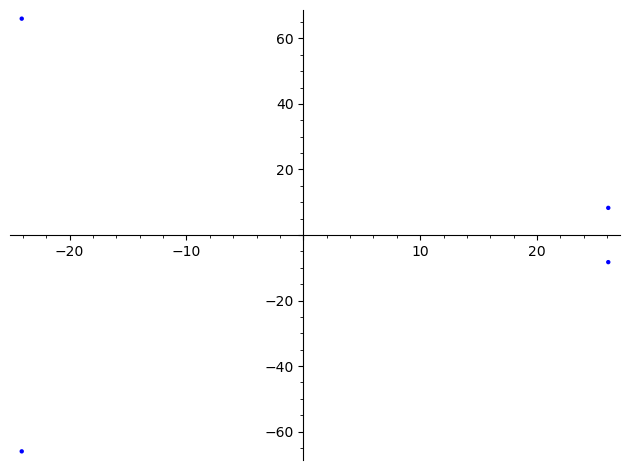

input: [1, 528, 26910, 440978]
matrix:
[     1     -1      0      0]
[   528      1     -2      0]
[ 26910    528      1     -3]
[440978  26910    528      1]
characteristic polynomial:
x^4 - 4*x^3 + 3174*x^2 - 221620*x + 3700669
roots:
[-24.090893192138612757632302288? - 66.019347772847863688310417399?*I, -24.090893192138612757632302288? + 66.019347772847863688310417399?*I, 26.0908931921386127576323022878? - 8.279587067383456770631186747?*I, 26.0908931921386127576323022878? + 8.279587067383456770631186747?*I]
centers:
[-24.090893192138612757632302288 - 66.019347772847863688310417399*I, -24.090893192138612757632302288 + 66.019347772847863688310417399*I, 26.090893192138612757632302288 - 8.2795870673834567706311867462*I, 26.090893192138612757632302288 + 8.2795870673834567706311867462*I]
maximum radius: 9.90889201059060e-30
absolute values of the roots:
[70.277488679855818667898123926?, 70.277488679855818667898123926?, 27.373093898388037351108069502?, 27.373093898388037351108069502?]
mini

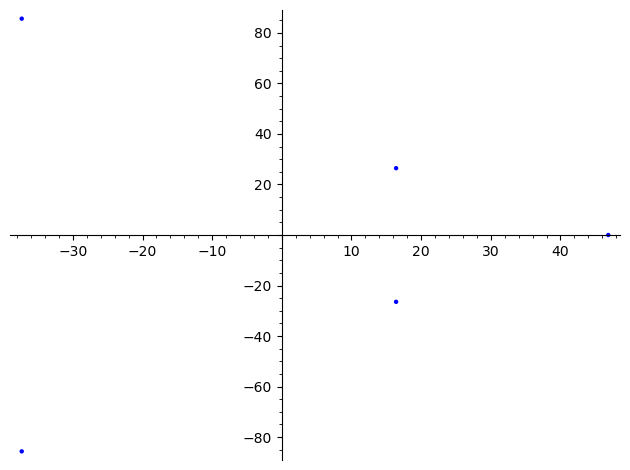

bound: 7


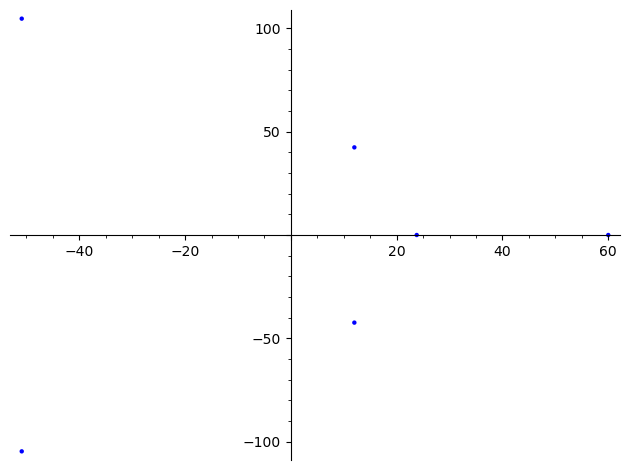

bound: 8


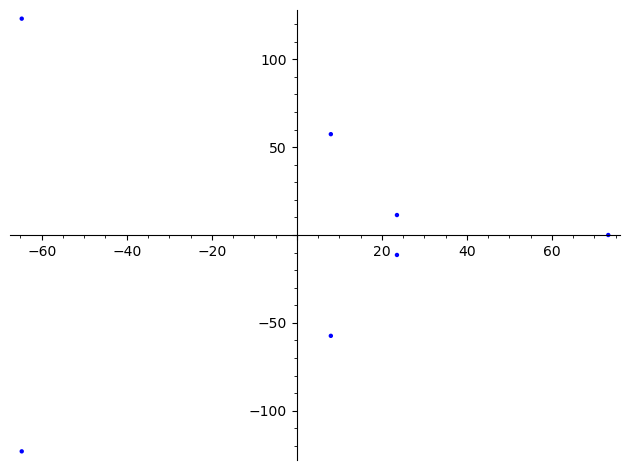

bound: 9


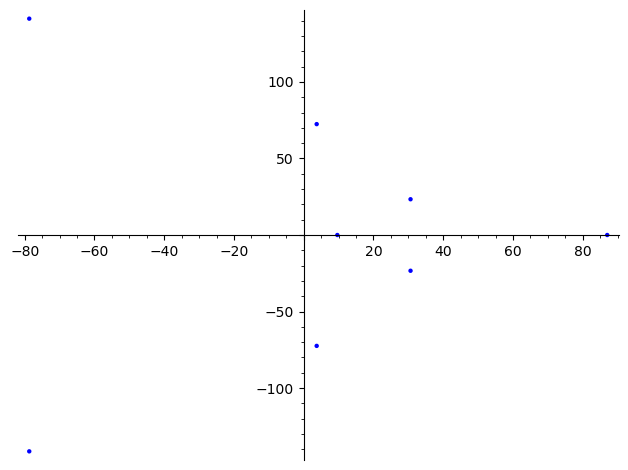

bound: 10


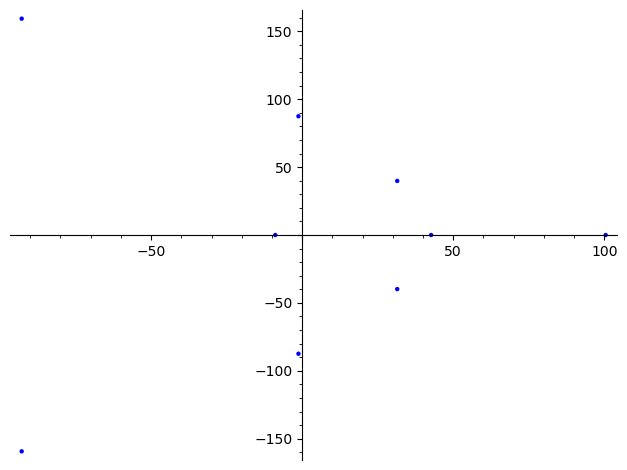

bound: 11


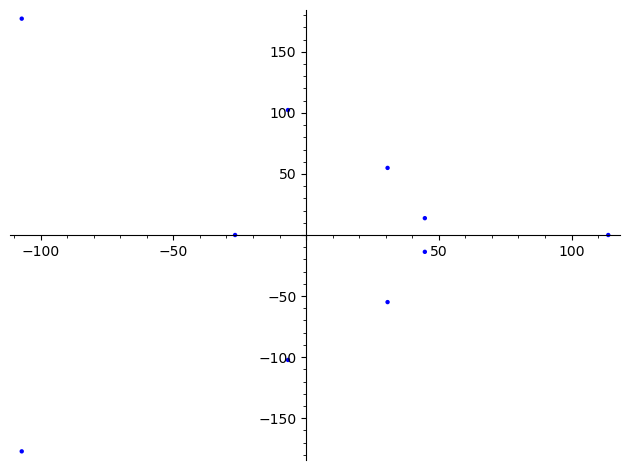

bound: 12


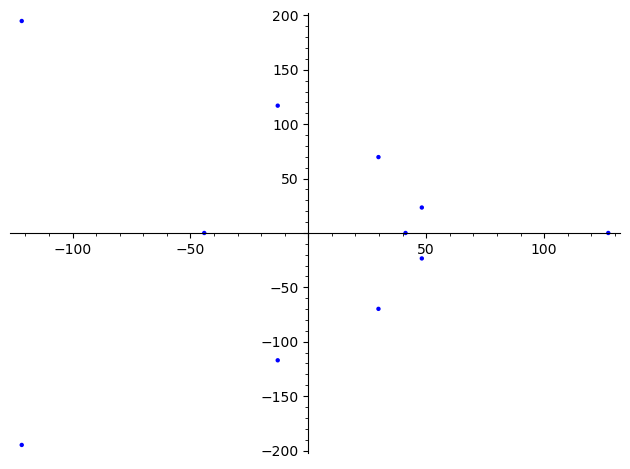

bound: 13


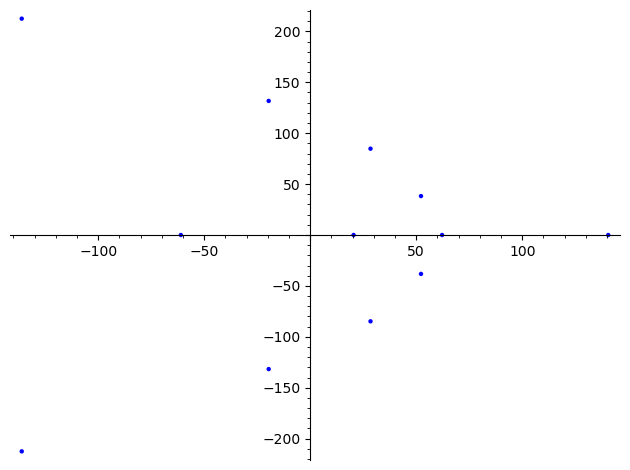

bound: 14


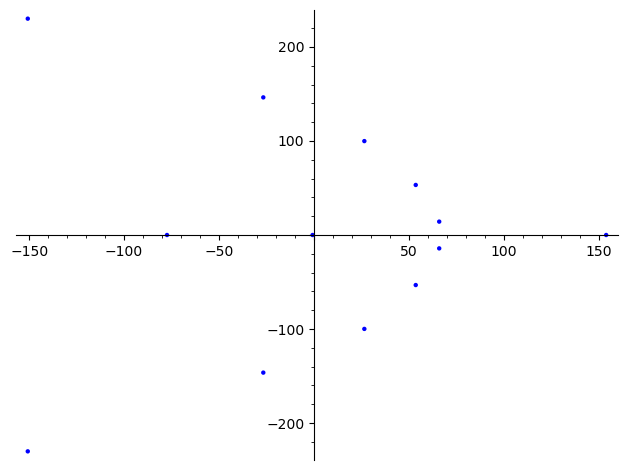

bound: 15


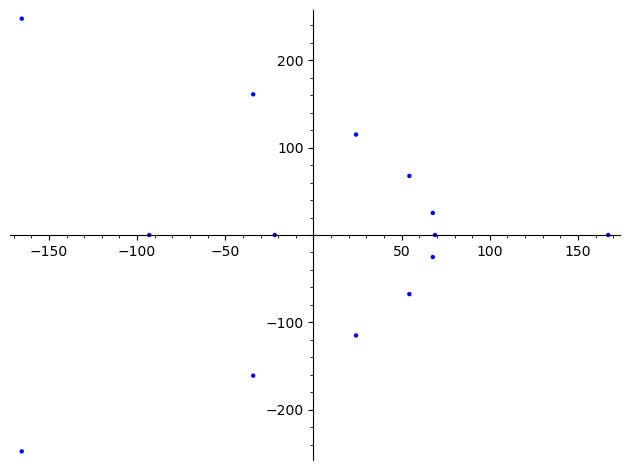

bound: 16


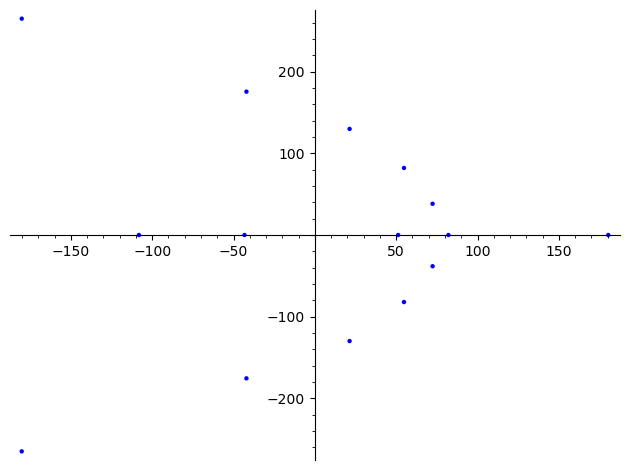

bound: 17


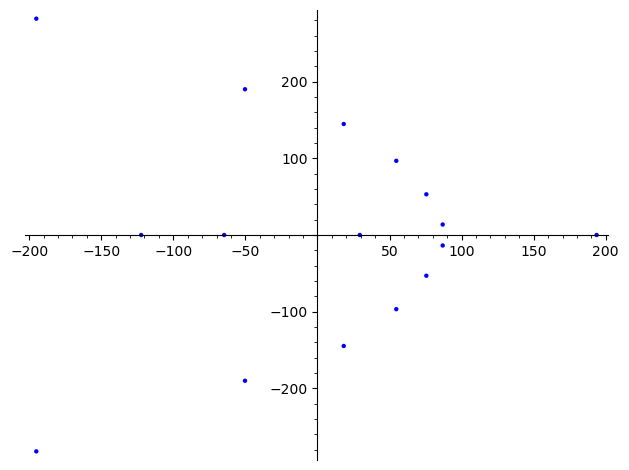

bound: 18


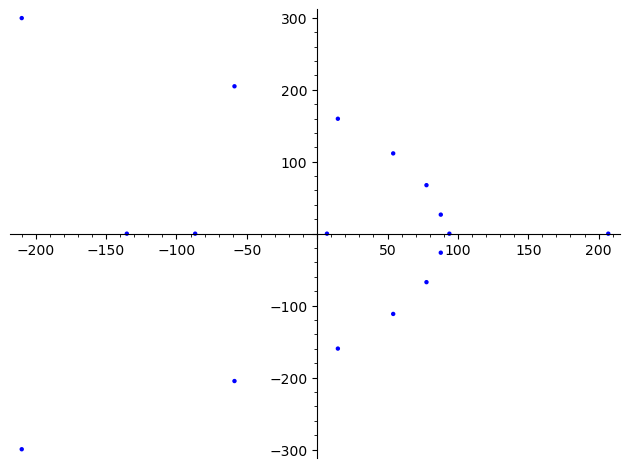

bound: 19


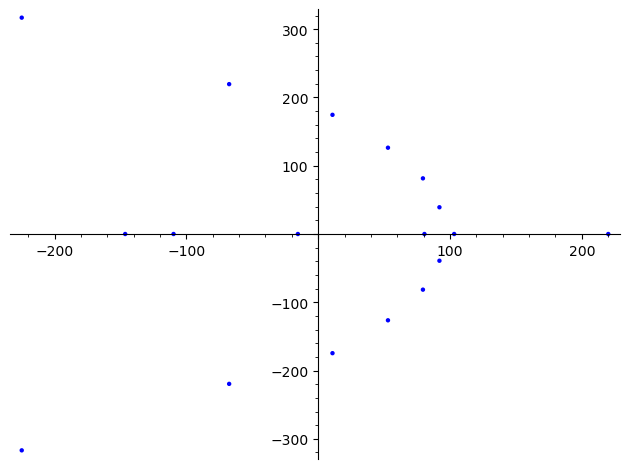

MINIMUM MODULI


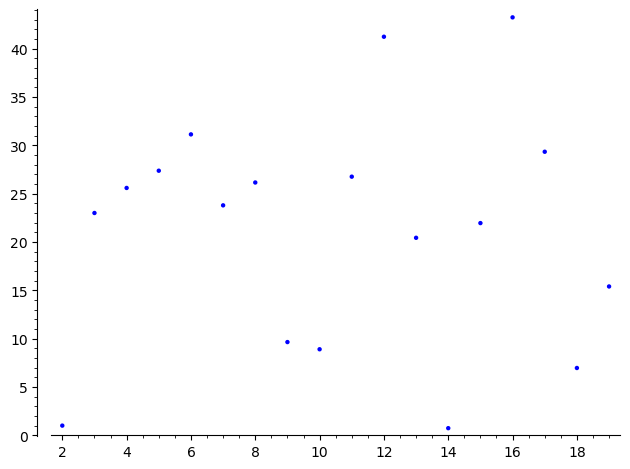

LOGS MINIMUM MODULI


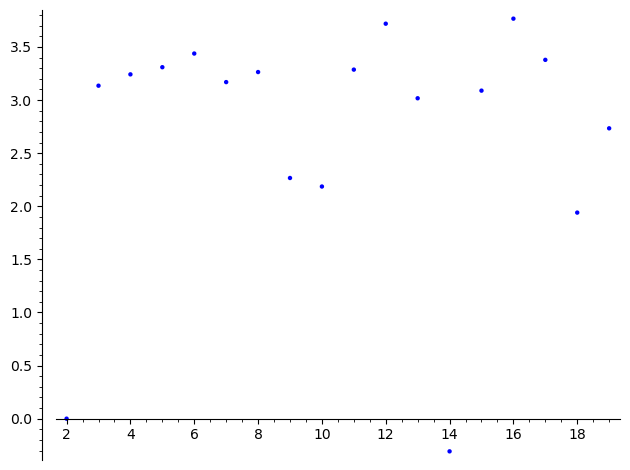

In [53]:
def P_matrix(lst):
    lenlist=len(lst)
    columns=[lst]
    for k in range(1,lenlist):
        column=[0]*(k-1)
        column=column+[-k]
        column=flatten(column+[lst])
        column=column+[lst]
        column=column[:lenlist]
        columns+=[column]
    return (matrix(columns)).transpose()

import pickle
with open('/Users/barrybrent/data/run27sept25no11.txt', 'rb') as rfile:
    j_list = pickle.load(rfile)
from sage.all import *
precision_bits = 100
CIF = ComplexIntervalField(precision_bits)
x = polygen(QQ)  # Can remain in preamble if all polynomials are in one variable
matrix_list=[]
charpol_list=[]
roots_list=[]
aar_list=[]
centers_list=[]
max_diameter_list=[]
mins_list=[]
log_mins_list=[]
for bound in range(2,20):
    print("bound:",bound)
    lst=j_list[1:bound]
    inpt=[j for j in lst]
    pl=P_matrix(inpt)
    matrix_list+=[(bound,pl)]
    cp=pl.charpoly()
    charpol_list+=[(bound,cp)]
    roots = cp.roots(ring=CIF, multiplicities=False)        # produces list of roots as Sage objects
    roots_list+=[(bound,roots)]
    centers=[r.center() for r in roots]
    pairs = [(z.real(), z.imag()) for z in centers]

# Plot the points (no lines, small points, only axis ticks)
    p = list_plot(pairs, plotjoined=False, pointsize=10, axes_labels=['', ''])
    p.show()
    centers_list+=[(bound,centers)]
    max_diameter=max([r.diameter() for r in roots])
    max_diameter_list+=[(bound,max_diameter)]
    aar = [r.abs() for r in roots]
    aar_list+=[(bound,aar)]
    # compute absolute value for each root (before any conversion)
    if aar!=[]:
        minn = min(aar)                                         # minimum modulus
        #mins_list+=[(bound,minn)]
        mins_list.append((bound,minn))
        log_minn=log(minn)
        log_mins_list.append((bound,log_minn))
    if bound<6:
        print("input:",inpt)
        print("matrix:")
        print(pl)    
        print("characteristic polynomial:")
        print(cp)
        print("roots:")
        print(roots)
        print("centers:")
        print(centers)
        print("maximum radius:",.5*max_diameter)
          
        if aar!=[]:
            print("absolute values of the roots:")
            print(aar)
            print("minimum modulus:")
            print(minn)  
    print("======================================================================================================")
p = list_plot(mins_list, plotjoined=False, pointsize=10, axes_labels=['', ''])
print("MINIMUM MODULI")
p.show()
p = list_plot(log_mins_list, plotjoined=False, pointsize=10, axes_labels=['', ''])
print("LOGS MINIMUM MODULI")
p.show()

In [ ]:
with open('/Users/barrybrent/data/run27sept25no11.txt', 'wb') as wfile:
    pickle.dump(j_list, wfile) #output snipped

bound: 2
-----------------------------------------------------------------------------------------
input: [1]
matrix:
[1]
characteristic polynomial:
x - 1
roots:
[1]
centers:
[1.0000000000000000000000000000]
maximum radius: 0.000000000000000
absolute values of the roots:
[1]
minimum modulus:
1
bound: 3
-----------------------------------------------------------------------------------------
input: [1, 528]
matrix:
[  1  -1]
[528   1]
characteristic polynomial:
x^2 - 2*x + 529
roots:
[1 - 22.9782505861521146394024458729?*I, 1 + 22.9782505861521146394024458729?*I]
centers:
[1.0000000000000000000000000000 - 22.978250586152114639402445873*I, 1.0000000000000000000000000000 + 22.978250586152114639402445873*I]
maximum radius: 5.49292229023855e-31
absolute values of the roots:
[23.0000000000000000000000000000?, 23.0000000000000000000000000000?]
minimum modulus:
23.0000000000000000000000000000?
bound: 4
-----------------------------------------------------------------------------------------
in

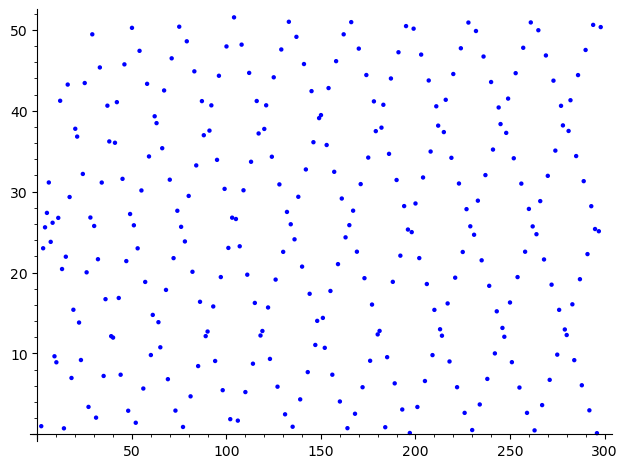

LOGS MINIMUM MODULI


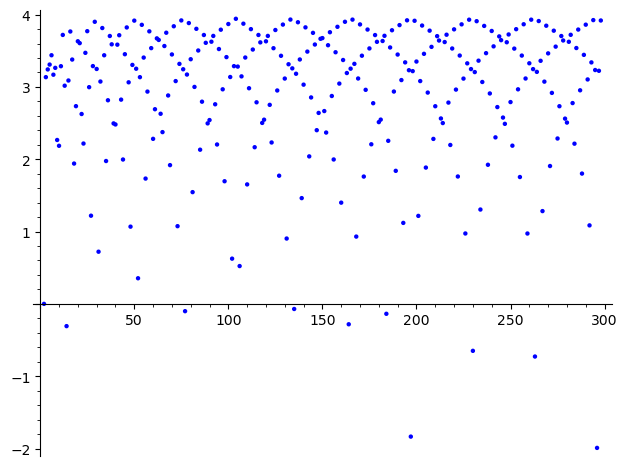

NameError: name 'char_pol_list' is not defined

In [55]:
def P_matrix(lst):
    lenlist=len(lst)
    columns=[lst]
    for k in range(1,lenlist):
        column=[0]*(k-1)
        column=column+[-k]
        column=flatten(column+[lst])
        column=column+[lst]
        column=column[:lenlist]
        columns+=[column]
    return (matrix(columns)).transpose()

import pickle
with open('/Users/barrybrent/data/run27sept25no11.txt', 'rb') as rfile:
    j_list = pickle.load(rfile)
from sage.all import *
precision_bits = 100
CIF = ComplexIntervalField(precision_bits)
x = polygen(QQ)  # Can remain in preamble if all polynomials are in one variable
matrix_list=[]
charpol_list=[]
roots_list=[]
aar_list=[]
centers_list=[]
max_diameter_list=[]
mins_list=[]
log_mins_list=[]
for bound in range(2,299):
    print("bound:",bound)
    lst=j_list[1:bound]
    inpt=[j for j in lst]
    pl=P_matrix(inpt)
    matrix_list+=[(bound,pl)]
    cp=pl.charpoly()
    charpol_list+=[(bound,cp)]
    roots = cp.roots(ring=CIF, multiplicities=False)        # produces list of roots as Sage objects
    roots_list+=[(bound,roots)]
    centers=[r.center() for r in roots]
    pairs = [(z.real(), z.imag()) for z in centers]


    centers_list+=[(bound,centers)]
    max_diameter=max([r.diameter() for r in roots])
    max_diameter_list+=[(bound,max_diameter)]
    aar = [r.abs() for r in roots]
    aar_list+=[(bound,aar)]
    # compute absolute value for each root (before any conversion)
    if aar!=[]:
        minn = min(aar)                                         # minimum modulus
        #mins_list+=[(bound,minn)]
        mins_list.append((bound,minn))
        log_minn=log(minn)
        log_mins_list.append((bound,log_minn))
    if bound<6:
        print("-----------------------------------------------------------------------------------------")
        print("input:",inpt)
        print("matrix:")
        print(pl)    
        print("characteristic polynomial:")
        print(cp)
        print("roots:")
        print(roots)
        print("centers:")
        print(centers)
        print("maximum radius:",.5*max_diameter)
          
        if aar!=[]:
            print("absolute values of the roots:")
            print(aar)
            print("minimum modulus:")
            print(minn)  
    
p = list_plot(mins_list, plotjoined=False, pointsize=10, axes_labels=['', ''])
print("MINIMUM MODULI")
p.show()
p = list_plot(log_mins_list, plotjoined=False, pointsize=10, axes_labels=['', ''])
print("LOGS MINIMUM MODULI")
p.show()



with open('/Users/barrybrent/data/run27sept25no12.txt', 'wb') as wfile:
    pickle.dump(mins_list, wfile) #output snipped

with open('/Users/barrybrent/data/run27sept25no13.txt', 'wb') as wfile:
    pickle.dump(roots_list, wfile) #output snipped

with open('/Users/barrybrent/data/run27sept25no14.txt', 'wb') as wfile:
    pickle.dump(char_pol_list, wfile) #output snipped

In [56]:
with open('/Users/barrybrent/data/run27sept25no14.txt', 'wb') as wfile:
    pickle.dump(charpol_list, wfile) #output snipped